In [49]:
# Adapted From https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Adapted From https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8
# Adapted from https://www.tensorflow.org/guide/keras/save_and_serialize
# imports 
import tensorflow as tf
from tensorflow import keras

# import the mnist dataset from keras
from keras.datasets import mnist
# matplotlib used to visualise the data
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [21]:
# Loading in the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
# (Amount of images in the dataset, Rows of pixels, Cols of pixels)
x_train.shape

(60000, 28, 28)

5


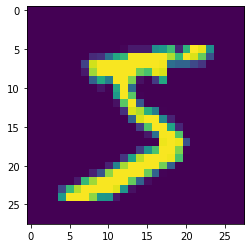

In [23]:
%matplotlib inline 
image_index = 0
print(y_train[image_index])
# Prints out the first image as it appears in the file
plt.imshow(x_train[image_index])

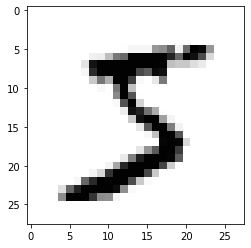

In [24]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Printing the first image out in greyscale
plt.imshow(x_train[image_index], cmap='Greys')

In [25]:
# The input shape that the CNN expects is a 4D Array - batch, height, width, channels
# The channels show whether the image is greyscaled or coloured
# 1 is given because greyscaled images are being used (3 for coloured)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
# dataset has each pixel between 0-255, it is now 0-1
# http://aishack.in/tutorials/normalized-rgb/
x_train /= 255
x_test /= 255

# print outs
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [62]:
# Creating a Sequential Model and adding the layers

    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))


In [63]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 40s 664us/step - loss: 0.2049 - accuracy: 0.9375


In [64]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 179us/step


[0.08617628741366788, 0.9728999733924866]

In [65]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [66]:
# Save predictions for future checks
predictions = model.predict(x_test)

In [72]:
try:
    # Save the model
    model.save('Model/model.h5')
except:
    # Recreate the exact same model purely from the file
    new = load_model('Model/model.h5')

0


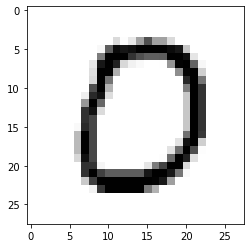

In [70]:
# prints out the first image in the test dataset
image_index = 10
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())